In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "C:/Users/bvkka/Desktop/states_all.csv"

# Read US Education file and store into Pandas data frame
df = pd.read_csv(file_to_load)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [2]:
# data frame with Selected columns
dfstate_year =df[['PRIMARY_KEY','STATE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','YEAR']].dropna(axis=0,how='any')
dfstate_year.head()


,PRIMARY_KEY,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,YEAR
2,1992_ARIZONA,ARIZONA,215.253932,265.366278,206.212716,262.169895,1992
3,1992_ARKANSAS,ARKANSAS,210.206028,256.312090,208.634458,264.619665,1992
5,1992_COLORADO,COLORADO,221.023429,272.398433,213.480890,266.419687,1992
6,1992_CONNECTICUT,CONNECTICUT,226.798480,273.739345,222.417599,264.713904,1992
7,1992_DELAWARE,DELAWARE,217.899972,262.868585,206.389052,261.577921,1992


In [3]:
#Removing Duplicates from Selected columns
dfstate_year=dfstate_year.drop_duplicates(subset=['PRIMARY_KEY'],keep=False)

In [4]:

df4 = dfstate_year
df4.head()

,PRIMARY_KEY,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,YEAR
2,1992_ARIZONA,ARIZONA,215.253932,265.366278,206.212716,262.169895,1992
3,1992_ARKANSAS,ARKANSAS,210.206028,256.312090,208.634458,264.619665,1992
5,1992_COLORADO,COLORADO,221.023429,272.398433,213.480890,266.419687,1992
6,1992_CONNECTICUT,CONNECTICUT,226.798480,273.739345,222.417599,264.713904,1992
7,1992_DELAWARE,DELAWARE,217.899972,262.868585,206.389052,261.577921,1992


The top 5 states with Highest Math Scores for 4 th grade

In [5]:
#For last 10 years , we are seeing top 5 states with highest math scores for 4th grade 
df6= df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].iloc[:,1:3]
df6.head()
df7 = df6.groupby('STATE').max().sort_values(by=['AVG_MATH_4_SCORE']).iloc[:,0].nlargest(5)
df7

#Reset the index of the DataFrame, and use the default one instead. Basically, we are reseting the State Index to default.
df7 = df7.reset_index(name = 'SCORE')
df7

C:\Users\bvkka\Anaconda3new\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,STATE,SCORE
0,MINNESOTA,253.420961
1,MASSACHUSETTS,253.396456
2,NEW_HAMPSHIRE,252.993525
3,NEW_JERSEY,248.621522
4,INDIANA,248.596777


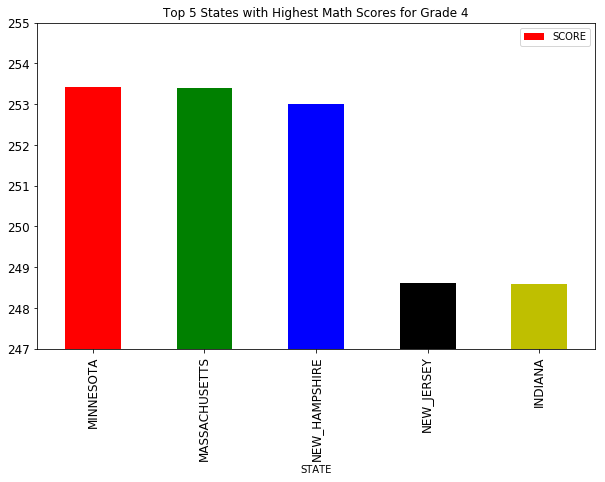

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df7.plot(x = 'STATE' , y ='SCORE' ,kind='bar',color = 'rgbkymc', title ="Top 5 States with Highest Math Scores for Grade 4", figsize=(10, 6), legend=True, fontsize=12)

ax.set_ylim(bottom = 247,top = 255)
plt.show()


The top 5 stated with Highest Math Scores for 8 th grade

In [18]:
#For last 10 years , we are seeing top 5 states with highest math scores for 8th grade 
df8= df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].drop(['PRIMARY_KEY', 'AVG_MATH_4_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','YEAR'], axis=1)
df8.head()
df88 = df8.groupby('STATE').max().sort_values(by=['AVG_MATH_8_SCORE']).iloc[:,0].nlargest(5)
df88.head()

df88 = df88.reset_index(name ='SCORE')
df88

C:\Users\bvkka\Anaconda3new\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,STATE,SCORE
0,MASSACHUSETTS,300.568235
1,NEW_JERSEY,296.053351
2,NEW_HAMPSHIRE,295.665123
3,VERMONT,295.469562
4,MINNESOTA,294.946423


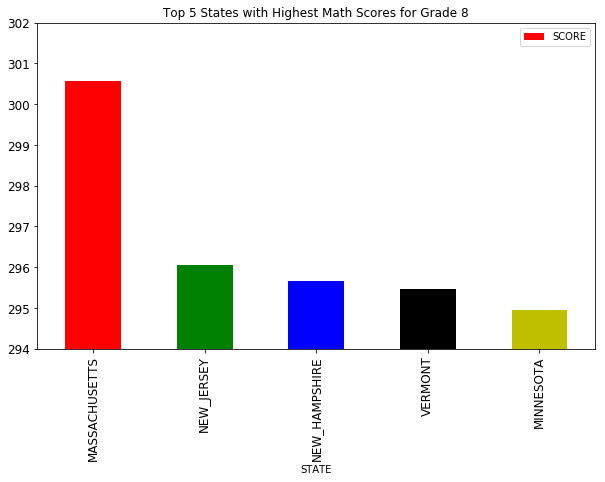

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df88.plot(x = 'STATE' , y ='SCORE' ,kind='bar',color = 'rgbkymc', title ="Top 5 States with Highest Math Scores for Grade 8", figsize=(10, 6), legend=True, fontsize=12)

ax.set_ylim(bottom = 294,top = 302)
plt.show()


The top 5 stated with Highest Reading Scores for 4 th grade

In [9]:
#For last 10 years , we are seeing top 5 states with highest READING scores for 4th grade 
df9= df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].drop(['PRIMARY_KEY', 'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE','YEAR'], axis=1)
df9.head()
df10 = df9.groupby('STATE').max().sort_values(by=['AVG_READING_4_SCORE']).iloc[:,0].nlargest(5)


df10 = df10.reset_index(name = 'SCORE')
df10

C:\Users\bvkka\Anaconda3new\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,STATE,SCORE
0,MASSACHUSETTS,236.773867
1,NEW_JERSEY,232.943318
2,MARYLAND,232.055973
3,NEW_HAMPSHIRE,231.998366
4,VERMONT,230.098617


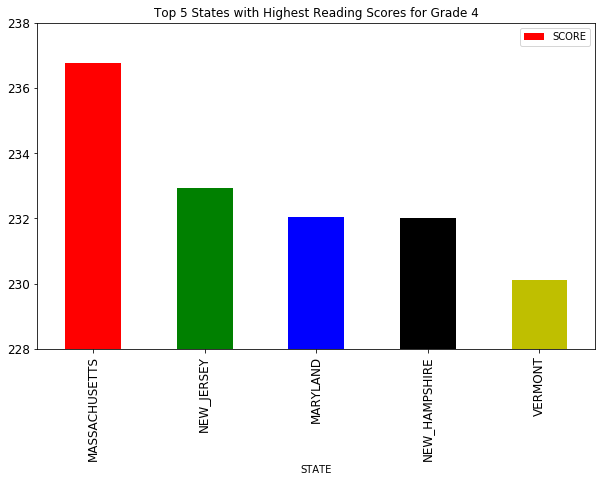

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df10.plot(x = 'STATE' , y = 'SCORE',color ='rgbkymc', kind='bar', title ="Top 5 States with Highest Reading Scores for Grade 4", figsize=(10, 6), legend=True, fontsize=12)

ax.set_ylim(bottom = 228,top = 238)
plt.show()

The top 5 stated with Highest Reading Scores for 8 th grade

In [12]:
#For last 10 years , we are seeing top 5 states with highest reading scores for 8th grade 
df11= df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].drop(['PRIMARY_KEY', 'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','YEAR'], axis=1)
df11.head()
df12 = df11.groupby('STATE').max().sort_values(by=['AVG_READING_8_SCORE']).iloc[:,0].nlargest(5)
df12.head()
df13 = df12.reset_index(name = 'SCORE')
df13


C:\Users\bvkka\Anaconda3new\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,STATE,SCORE
0,FLORIDA,280.499130
1,MICHIGAN,277.782589
2,GEORGIA,277.191363
3,MISSISSIPPI,277.009559
4,HAWAII,276.994367


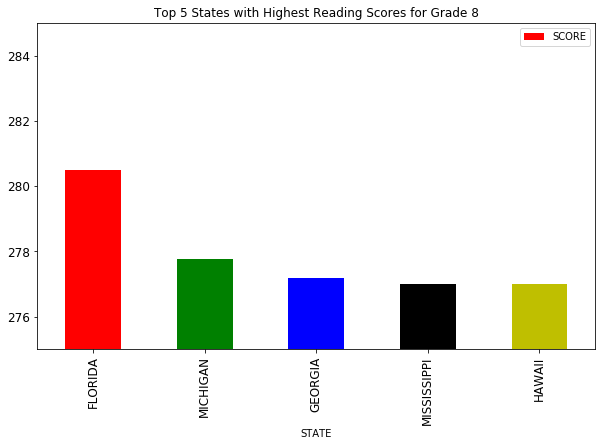

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


ax = df13.plot(x = 'STATE' , y = 'SCORE', kind='bar',color='rgbkymc', title ="Top 5 States with Highest Reading Scores for Grade 8", figsize=(10, 6), legend=True, fontsize=12)

ax.set_ylim(bottom = 275,top = 285)
plt.show()